In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# !pip install tensorflow==2.0.0-beta1
import tensorflow as tf
from tensorflow import keras
keras.__version__,tf.__version__,tf.test.is_gpu_available()

('2.2.4-tf', '2.0.0-beta1', False)

# Tensors

## Numbers

In [80]:
x=tf.Variable(1,dtype=float)    #init scalar
tf.zeros([2,3])
tf.ones([2,3])

<tf.Tensor: id=1241, shape=(2, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [ ]:
x.assign(2.)       # so that memory location is overwritten in-place
x.assign_add(0.1)  # add a number from current val
x.assign_sub(0.1)  # subtract a number from current val

In [65]:
tf.add([1, 2], [3, 4])
tf.square(5)
tf.reduce_sum([1, 2, 3],axis=None)   #  sum of elements across dimensions
tf.reduce_mean([1, 2, 3],axis=None)  # mean of elements across dimensions
# x, x.item()            # convert to python scalar

<tf.Tensor: id=950, shape=(), dtype=int32, numpy=2>

In [ ]:
intTensor / 2.0             # would raise error since they are of different types
tf.cast(intTensor, tf.float32) # typecasting

## Linear Alegra

In [4]:
tf.matmul([[1]], [[2, 3]])

<tf.Tensor: id=2, shape=(1, 2), dtype=int32, numpy=array([[2, 3]], dtype=int32)>

In [5]:
features = tf.random.normal((2,5)) #tensor of size (2,5)
# weights = 
# bias = tf.randn((1,1))
print(features)

tf.Tensor(
[[-0.1822676  -0.28430012 -0.07924211 -1.2497768   1.7792954 ]
 [-0.34286293  0.49567658  0.8082687  -0.9986611  -1.5563369 ]], shape=(2, 5), dtype=float32)


In [ ]:
M[tf.newaxis,...]   # add a new dim=1 dimension at the first dim

## Functions

In [121]:
1/(1 + tf.exp(tf.reduce_sum(features)))

<tf.Tensor: id=335063, shape=(), dtype=float32, numpy=0.1717741>

In [122]:
tf.nn.softmax(features)

<tf.Tensor: id=335065, shape=(2, 5), dtype=float32, numpy=
array([[0.05733178, 0.13426073, 0.32917118, 0.06783855, 0.41139778],
       [0.2680354 , 0.0566752 , 0.1565293 , 0.4928032 , 0.02595693]],
      dtype=float32)>

In [11]:
tf.add_n([tf.Variable(i) for i in range(10)])

<tf.Tensor: id=133, shape=(), dtype=int32, numpy=45>

In [ ]:
# self-defined function
@tf.function   # decorator to compile the function
def fn(inp):
    ...

## Autograd

In [15]:
x = tf.random.normal((2,2))
print(x.numpy()/2,x.numpy()*2)
with tf.GradientTape(persistent=True) as tape:  #persistent=True so that t.gradient can be called multiple times
    tape.watch(x)
    y = x*x
    z = tf.reduce_mean(y)

[[-0.4605462  -0.00614119]
 [ 0.335452   -0.43601644]] [[-1.8421848  -0.02456475]
 [ 1.341808   -1.7440658 ]]


To prove $
\frac{\partial z}{\partial x} = \frac{\partial}{\partial x}\left[\frac{1}{n}\sum_i^n x_i^2\right] = \frac{x}{2}
$ and $\frac{\partial y}{\partial x} = 2x$:

In [16]:
print(tape.gradient(z,x))  #=dz/dx
print(tape.gradient(y,x))  #=dy/dx
print(tape.gradient(z,[x,y]))  # can differentiate wrt multiple variables
del tape  # if persistent=True, remember to release the ref

tf.Tensor(
[[-0.4605462  -0.00614119]
 [ 0.335452   -0.43601644]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-1.8421848  -0.02456475]
 [ 1.341808   -1.7440658 ]], shape=(2, 2), dtype=float32)
[<tf.Tensor: id=122, shape=(2, 2), dtype=float32, numpy=
array([[-0.4605462 , -0.00614119],
       [ 0.335452  , -0.43601644]], dtype=float32)>, <tf.Tensor: id=119, shape=(2, 2), dtype=float32, numpy=
array([[0.25, 0.25],
       [0.25, 0.25]], dtype=float32)>]


In [79]:
# Higher order gradients using multiple GradientTape's
x = tf.Variable(3.14159)

with tf.GradientTape() as t:
    with tf.GradientTape() as t2:
        y = x * x * x
    dy_dx = t2.gradient(y, x)
d2y_dx2 = t.gradient(dy_dx, x)

print(dy_dx.numpy(), 3*x.numpy()**2) #d(x^3)/dx=3x^2
print(d2y_dx2.numpy(), 6*x.numpy())  #d(3x^2)/dx=6x

29.608767 29.608765416240203
18.84954 18.84954071044922


## To/from Numpy

Is memory shared?

In [47]:
import numpy as np
a = np.random.rand(2,2)
b = tf.add(a,0)
print(b)
print(b.numpy())

tf.Tensor(
[[0.07790517 0.87036976]
 [0.05034188 0.88710919]], shape=(2, 2), dtype=float64)
[[0.07790517 0.87036976]
 [0.05034188 0.88710919]]


In [48]:
b*=2 # inplace multiplication
a # shows that memory is shared

array([[0.07790517, 0.87036976],
       [0.05034188, 0.88710919]])

## [TF function and AutoGraph](https://www.tensorflow.org/alpha/tutorials/eager/tf_function)

# Datasets

## [Keras.datasets](https://keras.io/datasets/) 

all uint8:
* `mnist`: X.shape is (N, 28, 28); y.shape is (N,) from 0 to 9
* `fashion_mnist`: same as above
* `boston_housing`
* `cifar10`: X.shape is (N, 3, 32, 32); y.shape is (N,) from 0 to 9
* `cifar100`: X.shape is (N, 3, 32, 32); y.shape is (N,) of string labels
 * label_mode: `fine` or `coarse`.
* `imdb`
* `reuters`

In [82]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, 10)# convert class vectors to binary class matrices

# Conform with Convolution2D's requirements
X_train_ = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test_ = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

Using TensorFlow backend.


## [tensorflow_datasets](https://www.tensorflow.org/datasets/datasets)

In [ ]:
# !pip install tensorflow_datasets
# https://www.tensorflow.org/alpha/tutorials/images/transfer_learning

In [14]:
import tensorflow_datasets as tfds
splits = tfds.Split.TRAIN.subsplit(weighted=(8, 1, 1))  #(train, validation, test) with 80%, 10%, 10%

(raw_train, raw_validation, raw_test), metadata = tfds.load('cats_vs_dogs', split=(splits),
                                                            with_info=True, as_supervised=True)

print(raw_train, raw_validation, raw_test)

<_OptionsDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)> <_OptionsDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)> <_OptionsDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>


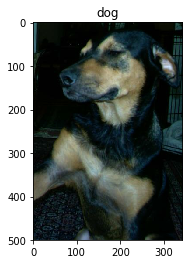

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

for image, label in raw_train.take(1):    ## .take()
    plt.figure()
    plt.imshow(image)
    plt.title(metadata.features['label'].int2str(label))  ##.int2str()

Resize (and others) by `tf.image`

In [20]:
def formatting(image, label):
    image = tf.cast(image, tf.float32)
    image = (image/127.5) - 1
    image = tf.image.resize(image, (160, 160))
    return image, label
train = raw_train.map(formatting)
validation = raw_validation.map(formatting)
test = raw_test.map(formatting)

In [22]:
train_batches = train.shuffle(1000).batch(32)  #shuffle's buffer size and batching
validation_batches = validation.batch(32)
test_batches = test.batch(32)
for image_batch, label_batch in train_batches.take(1):
    print(image_batch.shape, label_batch.shape)

(32, 160, 160, 3) (32,)


## Transformation (Augmentation)

Generators to transform image

In [86]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=40,     #randomly rotate 0-40 degrees
                                   width_shift_range=0.2, #randomly...
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoon_range=0.2,       # up to 20%
                                   horizontal_flip=True, #randomly flipped/not flipped
                                  )  # can do the same for validation
train_generator = train_datagen.flow_from_directory(
                    '/path/to/dir'
                    target_size=(300, 300),  # All images will be resized to 300x300
                    batch_size=128,
                    class_mode='binary')     # binary labels

## Custom Dataset

https://www.tensorflow.org/guide/datasets

In [12]:
raw=(np.random.rand(100,3,8),np.random.rand(100,5,9),np.random.rand(100))
data=tf.data.Dataset.from_tensor_slices(raw).shuffle(buffer_size=100).batch(10)
for d in data:
    print('each loop output tuples of shapes: ',list(map(lambda a:a.shape,d)))
    break

each loop output tuples of shapes:  [TensorShape([10, 3, 8]), TensorShape([10, 5, 9]), TensorShape([10])]


In [14]:
# transformation .map/.batch/.shuffle
ds_tensors = tf.data.Dataset.from_tensor_slices([1, 2, 3, 4, 5, 6])
ds_tensors = ds_tensors.map(tf.square).shuffle(2).batch(2)
for x in ds_tensors:    print(x)

tf.Tensor([1 9], shape=(2,), dtype=int32)
tf.Tensor([16 25], shape=(2,), dtype=int32)
tf.Tensor([ 4 36], shape=(2,), dtype=int32)


In [15]:
import tempfile
_, filename = tempfile.mkstemp()
with open(filename, 'w') as f:    f.write("""Line 1\nLine 2\nLine 3\n  """)
ds_file = tf.data.TextLineDataset(filename)
ds_file = ds_file.batch(2)  #loader
print('\nElements in ds_file:')
for x in ds_file:    print(x)


Elements in ds_file:
tf.Tensor([b'Line 1' b'Line 2'], shape=(2,), dtype=string)
tf.Tensor([b'Line 3' b'  '], shape=(2,), dtype=string)


## images Loader

In [ ]:
from keras.preprocessing import image  # single
image.load_img(path, target_size=(300, 300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)    # 1*300*300

In [ ]:
train_dataset = tf.data.Dataset.list_files('path/to/folder/*.jpg')
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.map(fn)  #fn takes in 1 tensor and outputs 2
train_dataset = train_dataset.batch(32)

## Download csv

In [97]:
import os
url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_fp = keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_fp))

Local copy of the dataset file: /Users/hoi/.keras/datasets/iris_training.csv


In [105]:
#lazy loader
train_Xy = tf.data.experimental.make_csv_dataset(
    train_fp,
    batch_size=5,
    column_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'],
    label_name='species',
    num_epochs=1)

In [107]:
# sample
X, y = next(iter(train_Xy))  #returns a batch
print(X,'\n',y)

OrderedDict([('sepal_length', <tf.Tensor: id=83673, shape=(5,), dtype=float32, numpy=array([4.7, 4.9, 7.7, 6. , 5.8], dtype=float32)>), ('sepal_width', <tf.Tensor: id=83674, shape=(5,), dtype=float32, numpy=array([3.2, 2.4, 3.8, 2.7, 2.6], dtype=float32)>), ('petal_length', <tf.Tensor: id=83671, shape=(5,), dtype=float32, numpy=array([1.6, 3.3, 6.7, 5.1, 4. ], dtype=float32)>), ('petal_width', <tf.Tensor: id=83672, shape=(5,), dtype=float32, numpy=array([0.2, 1. , 2.2, 1.6, 1.2], dtype=float32)>)]) 
 tf.Tensor([0 1 2 1 1], shape=(5,), dtype=int32)


In [113]:
# Convert from OrderedDict to a tensor
train_Xy = train_Xy.map(lambda X,y: (tf.stack(list(X.values()), axis=1),y) )
X, y = next(iter(train_Xy))  #returns a batch
print(X,'\n',y)

tf.Tensor(
[[4.7 3.2 1.6 0.2]
 [4.9 2.4 3.3 1. ]
 [7.7 3.8 6.7 2.2]
 [6.  2.7 5.1 1.6]
 [5.8 2.6 4.  1.2]], shape=(5, 4), dtype=float32) 
 tf.Tensor([0 1 2 1 1], shape=(5,), dtype=int32)


# Constructing Network

## Prebuilt <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers">Layers</a>

In [24]:
layer = tf.keras.layers.Dense(10)
layer(tf.zeros([10, 5]))  #forward an input tensor
layer.variables # ==.weights; outputs both "weights" and biases
layer.kernel, layer.bias

(<tf.Variable 'dense_5/kernel:0' shape=(5, 10) dtype=float32, numpy=
 array([[-0.23853138, -0.47463644, -0.40410075,  0.3337345 ,  0.05842251,
         -0.2110303 , -0.37228498, -0.52343273, -0.1935311 ,  0.31415182],
        [-0.47757697,  0.1872893 ,  0.36996263,  0.53191036, -0.41023302,
         -0.36609358, -0.62482274, -0.32694978, -0.46359128, -0.11053449],
        [ 0.5979156 , -0.6117383 ,  0.52128893, -0.20676479, -0.3525084 ,
          0.2735374 , -0.5580343 , -0.06586772,  0.1952563 ,  0.3177566 ],
        [-0.04371983,  0.25442594,  0.5144964 ,  0.03669256, -0.4263901 ,
         -0.47154313,  0.18181372, -0.14908463, -0.6010451 ,  0.37639374],
        [-0.60666305,  0.17177355, -0.03292   , -0.6297653 , -0.30985603,
          0.22744763,  0.08481169,  0.03695041, -0.4091086 ,  0.21218657]],
       dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>)

## Custom Layer

In [11]:
class MyDenseLayer(tf.keras.layers.Layer):
    def __init__(self, num_outputs): # does not know the input shape yet
        super(MyDenseLayer, self).__init__()
        self.num_outputs = num_outputs

    def build(self, input_shape):    # called before call() during the first forwarding; knows input shape incl batchsize
        self.kernel = self.add_variable("kernel",   # add .kernel variable
                                        shape=[int(input_shape[-1]),
                                               self.num_outputs])

    def call(self, inp):             # called 2nd when forwarding
        return tf.matmul(inp, self.kernel)

layer = MyDenseLayer(10)
layer(tf.zeros([10, 5]))  # forwarding: first call .build(), then call .call()
layer.trainable_variables

[<tf.Variable 'my_dense_layer_5/kernel:0' shape=(5, 10) dtype=float32, numpy=
 array([[-0.4540418 , -0.2990369 , -0.49267218,  0.5920151 ,  0.5552302 ,
         -0.33874014, -0.4846565 ,  0.45683295,  0.06221515,  0.09293061],
        [ 0.55107707, -0.19835633,  0.1947149 ,  0.40248817, -0.12899184,
          0.5836112 , -0.22081095,  0.22574902,  0.2857204 , -0.2629867 ],
        [ 0.49847072,  0.4431873 ,  0.48922926, -0.10104519, -0.43269324,
         -0.36508268,  0.25309986,  0.12925327, -0.27615872, -0.5912008 ],
        [ 0.2552206 , -0.35639197, -0.06904668, -0.22563031,  0.23116064,
         -0.43270576,  0.01370054, -0.12687927,  0.5277557 ,  0.60341734],
        [-0.4205001 ,  0.24687624,  0.55920273, -0.6234937 , -0.19329903,
          0.4769693 ,  0.10170698, -0.24372715, -0.02214068, -0.11421496]],
       dtype=float32)>]

In [7]:
# composing multiple layers to a usable layer
class ResnetIdentityBlock(tf.keras.Model):
    def __init__(self, kernel_size, filters):
        super(ResnetIdentityBlock, self).__init__(name='')
        filters1, filters2, filters3 = filters

        self.conv2a = tf.keras.layers.Conv2D(filters1, (1, 1))
        self.bn2a = tf.keras.layers.BatchNormalization()

        self.conv2b = tf.keras.layers.Conv2D(filters2, kernel_size, padding='same')
        self.bn2b = tf.keras.layers.BatchNormalization()

        self.conv2c = tf.keras.layers.Conv2D(filters3, (1, 1))
        self.bn2c = tf.keras.layers.BatchNormalization()

    def call(self, input_tensor, training=False):
        x = self.conv2a(input_tensor)
        x = self.bn2a(x, training=training)
        x = tf.nn.relu(x)

        x = self.conv2b(x)
        x = self.bn2b(x, training=training)
        x = tf.nn.relu(x)

        x = self.conv2c(x)
        x = self.bn2c(x, training=training)

        x += input_tensor
        return tf.nn.relu(x)

block = ResnetIdentityBlock(1, [1, 2, 3])
print(block(tf.zeros([1, 2, 3, 3])))
print([x.name for x in block.trainable_variables])

tf.Tensor(
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]], shape=(1, 2, 3, 3), dtype=float32)
['resnet_identity_block/conv2d/kernel:0', 'resnet_identity_block/conv2d/bias:0', 'resnet_identity_block/batch_normalization_v2/gamma:0', 'resnet_identity_block/batch_normalization_v2/beta:0', 'resnet_identity_block/conv2d_1/kernel:0', 'resnet_identity_block/conv2d_1/bias:0', 'resnet_identity_block/batch_normalization_v2_1/gamma:0', 'resnet_identity_block/batch_normalization_v2_1/beta:0', 'resnet_identity_block/conv2d_2/kernel:0', 'resnet_identity_block/conv2d_2/bias:0', 'resnet_identity_block/batch_normalization_v2_2/gamma:0', 'resnet_identity_block/batch_normalization_v2_2/beta:0']


## Sequential Building

In [ ]:
from keras.models import Sequential
model = Sequential()

In [ ]:
from keras.layers import Dense
model.add(Dense(512, input_shape=(96,96)))

<a href="https://keras.io/layers/core/#dense">Dense</a>(output_dim, input_shape, init, W_regularizer)
* output_dim: Linear channel's length
* input_shape: only necessary on first layer; otherwise is inferred internally
* init: "glorot_normal"
* W_regularizer=l2(0.1) [from keras.regularizers import l2]
* activation: if specified, equiv to addling the Activation layer as the next item

<a href="https://keras.io/layers/core/#activation">Activation</a>(<a href="https://keras.io/activations/">activation</a>)
* 'relu', 'softplus', 'softsign', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear', 'softmax'(3dim or 2dim)
* custom function with 1 input & 1 output

<a href="https://keras.io/layers/convolutional/#convolution2d">Convolution2D</a>(nb_filter, nb_row, nb_col, init='glorot_uniform', activation='linear', weights=None, border_mode='valid', subsample=(1, 1), dim_ordering='default', W_regularizer=None, b_regularizer=None, activity_regularizer=None, W_constraint=None, b_constraint=None, bias=True)
* Input shape: 4D tensor with shape: (samples, channels, rows, cols) if dim_ordering='th' or 4D tensor with shape: (samples, rows, cols, channels) if dim_ordering='tf'.

MaxPooling2D(pool_size=pool_size)

merge([tower_1, tower_2, tower_3], mode='concat', concat_axis=1)

Flatten()

<a href="https://keras.io/layers/wrappers/#timedistributed">TimeDistributed</a>(Dense(10,input_shape))
* input must be at least 3D (batchSize x timeSteps x DenseInput)

## Functional API build step by step as walkthrough

https://keras.io/getting-started/functional-api-guide/

In [ ]:
from keras.layers import Input, TimeDistributed
from keras.layers import Dense, ...

In [ ]:
inputs = Input(shape=(100,), dtype='int32') #to specify input shape (excluding the first dim which is always batchsize)
x = Dense(64, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)
model = Model(input=inputs, output=predictions)

In [ ]:
x = Input(shape=(dim1, dim2, dim3))
a = TimeDistributed(LSTM(output_dim=10))(x) #apply "LSTM" model to each of dim1's elements
b = LSTM(col_hidden)(a)
prediction = Dense(nb_classes, activation='softmax')(b)
model = Model(input=x, output=prediction)

In [ ]:
model = Model(input=[main_input, auxiliary_input], output=[main_output, auxiliary_output]) #multi-input/outputs
model.compile(optimizer='rmsprop', loss='binary_crossentropy', loss_weights=[1., 0.2])
model.fit([headline_data, additional_data], [labels, labels],nb_epoch=50, batch_size=32)
# if names are provided for the inputs/outputs:
model.compile(optimizer='rmsprop',loss={'main_output': 'binary_crossentropy', 'aux_output': 'binary_crossentropy'},
                          loss_weights={'main_output': 1., 'aux_output': 0.2})
model.fit({'main_input': headline_data, 'aux_input': additional_data},
          {'main_output': labels, 'aux_output': labels},
          nb_epoch=50, batch_size=32)

## Common Model Properties

In [ ]:
model.summary()  #human-readable
model.output_shape # shape of output
model.trainable_variables  #list of trainable variables

In [ ]:
from keras.models import model_from_json
model.save_weights("model.h5", overwrite=True)
with open("model.json", "w") as outfile:  #uncompiled
    json.dump(model.to_json(), outfile)
with open("model.json", "r") as jfile:
    model = model_from_json(json.load(jfile))
model.load_weights("model.h5")

In [ ]:
model.add(Dense(64, activation='relu', name="dense_one"))
model.get_layer("dense_one")  #get layer by name

## Common Layer Properties

In [ ]:
layer = model.layers[0]  #extract the first layer from the list of model's layers
layer.get_weights()[0] # For "Dense": 0 for weights, 1 for bias
layer.set_weights(weights) # sets the weights of the layer from a list of Numpy arrays 
layer.get_config()# returns a dictionary containing the configuration of the layer. 

If a layer has a single node (i.e. if it isn't a shared layer), you can get its input tensor, output tensor, input shape and output shape via:

    layer.input
    layer.output
    layer.input_shape
    layer.output_shape

If the layer has multiple nodes (see: the concept of layer node and shared layers), you can use the following methods:

    layer.get_input_at(node_index)
    layer.get_output_at(node_index)
    layer.get_input_shape_at(node_index)
    layer.get_output_shape_at(node_index)

## Composite model specifying inputs/outputs

Use `keras.Model(inputs = ..., outputs = ...)` to build custom model that outputs intermediate outputs:

In [ ]:
activation = keras.Model(inputs = model.input, outputs = [layer.output for layer in model.layers] )   # all intermediate outputs
activation.predict(BatchData)  # returns len([outputs])*batchsize*height*width*convolution_Depth

Example: Video question/answer https://www.youtube.com/watch?v=UeheTiBJ0Io

In [ ]:
video = keras.layers.Input(shape=(None,100,100,3))
cnn = keras.applications.InceptionV3(weights='imagenet',
                                        include_top=False,
                                        pool='avg')
cnn.trainable = False
encoded_frames = keras.layers.TimeDistributed(cnn)(video)
encoded_vid = tf.layers.LSTM(256)(encoded_frames)

question = keras.layers.Input(shape=100, dtype='int32')
x = keras.layers.Embedding(10000, 256, mask_zero=True)(question) #vocab_size*embed_dim
encoded_q = keras.layers.LSTM(128)(x)

x = keras.layers.concat([encoded_vid, encoded_q])
x = keras.layers.Dense(128, activation=tf.nn.relu)(x)
outputs = keras.layers.Dense(1000)(x) #possible answers

model = keras.Model(inputs = [video, question], outputs)
model.compile(optimizer=tf.AdamOptimizer(),
              loss=tf.softmax_crossentropy_with_logits)

# Training Network

## Custom Training

In [ ]:
# compute d(loss)/d(param)
with tf.GradientTape() as tape:
    loss = loss(model(inputs), outputs)                # forward pass with gradients recorded
grads = tape.gradient(loss, model.trainable_variables)  # differentiate loss wrt parameters

##################EITHER######################
for i, param in enumerate(model.trainable_variables):
    param.assign_sub(learning_alpha * grads[i])  # simple gradient descent
##################OR##########################
optimizer.apply_gradients(zip(grads, model.trainable_variables))

Example:

In [114]:
class Model(object):                     # simple linear model y=wx+b
    def __init__(self):
        self.w = tf.Variable(5.0)
        self.b = tf.Variable(0.0)
    def __call__(self, x):               # defines behavior for model()
        return self.w * x + self.b
model = Model()
 
def loss(pred, true):                    # simple mean square error
    return tf.reduce_mean(tf.square(pred - true))

inputs  = tf.random.normal(shape=[1000])
noise   = tf.random.normal(shape=[1000])
outputs = 3. * inputs + 2. + noise       # correct w & b

for _ in range(1000):
    with tf.GradientTape() as t:
        train_loss = loss(model(inputs), outputs)
    dlossdw, dlossdb = t.gradient(train_loss, [model.w, model.b])
    model.w.assign_sub(.01 * dlossdw)    # simple gradient descent
    model.b.assign_sub(.01 * dlossdb)
    
print(model.w.numpy(), model.b.numpy())

2.9692693 1.9745175


## Custom grad + [Keras Optimizer](https://keras.io/optimizers/)

In [ ]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.01)
optimizer.apply_gradients(zip(grads, [model.w, model.b]))

Example:

In [117]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.01)

class Model(object):                     # simple linear model y=wx+b
    def __init__(self):
        self.w = tf.Variable(5.0)
        self.b = tf.Variable(0.0)
    def __call__(self, x):               # defines behavior for model()
        return self.w * x + self.b
model = Model()
 
def loss(pred, true):                    # simple mean square error
    return tf.reduce_mean(tf.square(pred - true))

for _ in range(1000):
    with tf.GradientTape() as t:
        train_loss = loss(model(inputs), outputs)
    grads = t.gradient(train_loss, [model.w, model.b])
    optimizer.apply_gradients(zip(grads, [model.w, model.b]))
    
print(model.w.numpy(), model.b.numpy())

2.974263 1.9795204


## Keras Loss & Optimizer

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy']) 

[Compilation parameters](https://keras.io/models/model/):
* [loss](https://keras.io/losses/):
  * `categorical_crossentropy`: model output after softmax activation. y of shape (N,nclass), i.e. one-hot encoded
  * `sparse_categorical_crossentropy`: model output after softmax activation. y of shape (N,), i.e. non-one-hot encoded
  * `tf.keras.losses.BinaryCrossentropy(from_logits=True)`: same as above, but before softmax
  * `tf.nn.softmax_cross_entropy_with_logits`: model output before softmax
  * `binary_crossentropy`: model output after sigmoid activation. y is a single number
  * `tf.nn.sigmoid_cross_entropy_with_logits`: model output before sigmoid
  * 'mse' (mean_squared_error)
  * 'mae'
  * 'mape', squared_hinge, hinge, , kld (kullback_leibler_divergence),
  * 'poisson' [Mean of (predictions - targets * log(predictions))]
  * 'cosine_proximity'
* [optimizer](https://keras.io/optimizers/): common parameters are clipnorm (max allowed gradient 2-norm) and clipvalue (max allowed gradient 1-norm)
  * 'sgd' or SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
  * 'adagrad' or Adagrad(lr=0.01, epsilon=1e-08, decay=0.0)
  * 'rmsprop' or RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
  * 'adadelta' or Adadelta(lr=1.0, rho=0.95, epsilon=1e-08, decay=0.0)
  * 'adam' or Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
  * 'adamax' or Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
  * 'nadam' or Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08, schedule_decay=0.004)
* [metrics](https://keras.io/metrics/): list of metrics to be evaluated by the model during training and testing
  * 'accuracy'
* sample_weight_mode: If you need to do timestep-wise sample weighting (2D weights), set this to "temporal".  None defaults to sample-wise weights (1D). If the model has multiple outputs, you can use a different  sample_weight_mode on each output by passing a dictionary or a list of modes.

In [ ]:
# with early stopping...
import tempfile
_,weightsfile=tempfile.mkstemp()
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
es=EarlyStopping(monitor='val_loss', patience=patience, verbose=1)
mc=ModelCheckpoint(weightsfile,monitor='val_loss',save_best_only=True,save_weights_only=True,verbose=0)

history = model.fit(x,y,batch_size=32, epochs=10,      # or .fit_generator() with x a generator
                    callbacks=[es,mc], verbose=1,
#                     validation_split=0.0,              # either this line or next line
                    validation_data=(X_val, y_val),    # or generator yielding a tuple
                    shuffle=True, class_weight=None, sample_weight=None)
# loss = model.train_on_batch(xbatch,ybatch)  #returns loss
model.load_weights(weightsfile)

[Parameters](https://keras.io/models/model/):

* `x`: Numpy array of training data, or list of Numpy arrays if the model has multiple inputs. If all inputs in the model are named, you can also pass a dictionary mapping input names to Numpy arrays.
* `y`: Numpy array of target data, or list of Numpy arrays if the model has multiple outputs. If all outputs in the model are named, you can also pass a dictionary mapping output names to Numpy arrays.
* `batch_size`: integer. Number of samples per gradient update.
* `epochs`: integer, the number of times to iterate over the training data arrays.
* `verbose`: 0, 1, or 2. Verbosity mode. 0 = silent, 1 = verbose, 2 = one log line per epoch.
* `validation_split`: float between 0 and 1: fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch.
* `validation_data`: data on which to evaluate the loss and any model metrics at the end of each epoch. The model will not be trained on this data. This could be a tuple (x_val, y_val) or a tuple (val_x, val_y, val_sample_weights).
* `shuffle`: boolean, whether to shuffle the training data before each epoch.
* `class_weight`: optional dictionary mapping class indices (integers) to a weight (float) to apply to the model's loss for the samples from this class during training. This can be useful to tell the model to "pay more attention" to samples from an under-represented class.
* `sample_weight`: optional array of the same length as x, containing weights to apply to the model's loss for each sample. In the case of temporal data, you can pass a 2D array with shape (samples, sequence_length), to apply a different weight to every timestep of every sample. In this case you should make sure to specify sample_weight_mode="temporal" in compile().
* `callbacks`: list of callbacks to be called during training. See callbacks.

In [ ]:
# General model() class
# https://keras.io/models/model/
evaluate(self, x, y, batch_size=32, verbose=1, sample_weight=None)   # returns  loss, metric
predict(self, x, batch_size=32, verbose=0)
train_on_batch(self, x, y, sample_weight=None, class_weight=None)
test_on_batch(self, x, y, sample_weight=None)
predict_on_batch(self, x)
fit_generator(self, generator, steps_per_epoch,  #for infinite generator, steps_per_epoch
              nb_epoch, verbose=1, callbacks=[], validation_data=None, nb_val_samples=None, class_weight={}, max_q_size=10, nb_worker=1, pickle_safe=False)
evaluate_generator(self, generator, val_samples, max_q_size=10, nb_worker=1, pickle_safe=False)
predict_generator(self, generator, val_samples, max_q_size=10, nb_worker=1, pickle_safe=False)
get_layer(self, name=None, index=None)

In [ ]:
# Sequential() only ?
# https://keras.io/models/sequential/
predict_classes(self, x, batch_size=32, verbose=1)
predict_proba(self, x, batch_size=32, verbose=1)

### Sample callbacks

usage: `model.fit(..., callbacks=[myCallback()])`

In [ ]:
#stop training once loss<.4
class myCallback(tf.keras.callbacks.Callback):  
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')<0.4):
            self.model.stop_training = True

In [ ]:
#log the loss and accuracy of each batch individually, instead of the epoch average
class CollectBatchStats(tf.keras.callbacks.Callback):
    def __init__(self):
        self.batch_losses = []
        self.batch_acc = []
    def on_train_batch_end(self, batch, logs=None):
        self.batch_losses.append(logs['loss'])
        self.batch_acc.append(logs['acc'])
        self.model.reset_metrics()
    # after training, fetch history with <inst>.batch_losses

can directly use TensorBoard, or customize methods:

In [6]:
class ModifiedTensorBoard(tf.keras.callbacks.TensorBoard):

    # Overriding init to set initial step and writer (we want one log file for all .fit() calls)
    def __init__(self, **kwargs): # default log_dir=./logs
        super().__init__(**kwargs)
        self.step = 1
        self.writer = tf.summary.FileWriter(self.log_dir)

    # Overriding this method to stop creating default log writer
    def set_model(self, model):
        pass

    # Overrided, saves logs with our step number
    # (otherwise every .fit() will start writing from 0th step)
    def on_epoch_end(self, epoch, logs=None):
        self.update_stats(**logs)

    # Override as we train for one batch only, no need to save anything at epoch end
    def on_batch_end(self, batch, logs=None):
        pass

    # Overrided, so won't close writer
    def on_train_end(self, _):
        pass

    # Custom method for saving own metrics
    # Creates writer, writes custom metrics and closes writer
    def update_stats(self, **stats):
        self._write_logs(stats, self.step)

# visualize history with $ tensorboard --logdir=./logs

# Save / load

If some custom layers in the model to be saved/loaded, add kw arg e.g. `custom_objects={'AttentionLayer': AttentionLayer}`, where `AttentionLayer` is a class object

In [ ]:
#architecture + weights + optimizer state
model.save('filepath') #single HDF5 file which will contain:
model = keras.models.load_model('filepath') 

In [ ]:
#architecture only
jstr = model.to_json()
model = model_from_json(jstr)

In [ ]:
#weights only
model.save_weights('my_model_weights.h5')
model.load_weights('my_model_weights.h5')
model.load_weights('my_model_weights.h5', by_name=True) #into a different architecture, with some layers in common)

Using `tensorflow`'s object-based saving:

In [ ]:
ckpt = tf.train.Checkpoint(generator_optimizer=generator_optimizer,  #use kw to pass-in objects to be saved
                           discriminator_optimizer=discriminator_optimizer,
                           generator=generator,
                           discriminator=discriminator)
#
ckpt.save(file_prefix = 'path/to/folder/file.pt')
ckpt.restore(tf.train.latest_checkpoint('path/to/folder/'))
# or
ckpt_manager = tf.train.CheckpointManager(ckpt, '/path/to/folder', max_to_keep=5)
if ckpt_manager.latest_checkpoint:# if a checkpoint exists, restore the latest checkpoint to resume
    ckpt.restore(ckpt_manager.latest_checkpoint)

## Pretrained models from Built-in 

In [ ]:
basemodel = keras.applications.MobileNetV2(input_shape=(160,160,3), #width*height*channels
                                           include_top=False,  #exlucde top layer (load only feature extraction layer)
                                           weights='imagenet')
print(basemodel.summary())

In [31]:
basemodel.trainable = False                   # Freeze parameters of the feature detector
    
# stack with custom classifier on the top
model = tf.keras.Sequential([
  basemodel,
  keras.layers.GlobalAveragePooling2D(),
  keras.layers.Dense(1)                   # no activation    
])    
print(len(model.trainable_variables))     # weights & bias of two layers
# model.compile(...)
# model.fit(...)
model.summary()

2
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_4 ( (None, 1280)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
# fine-tuning: train some part (mostly top layers) of the feature extractor
for layer in basemodel.layers[100:]:
    layer.trainable = True
# model.compile(...)
# model.fit(...)

## Pretrained models from TFHub

https://www.tensorflow.org/alpha/tutorials/images/hub_with_keras

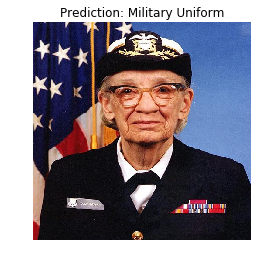

In [38]:
import tensorflow_hub as hub
url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2" #@param {type:"string"}

classifier = tf.keras.Sequential([
    hub.KerasLayer(url, input_shape=(224,224, 3))
])
# example
import numpy as np
import PIL.Image as Image
img=keras.utils.get_file('image.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg')
img=Image.open(img).resize((224,224))
img=np.array(img)/255.0
result = classifier.predict(img[np.newaxis, ...])  #before softmax

#fetch labels & show
import matplotlib.pylab as plt
%matplotlib inline
labels = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
labels = np.array(open(labels).read().splitlines())
plt.imshow(img)
plt.axis('off')
predicted_class_name = labels[np.argmax(result[0], axis=-1)]
_ = plt.title("Prediction: " + predicted_class_name.title())

In [ ]:
# headless - without classification layer
url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2" #@param {type:"string"}
feature_extractor_layer = hub.KerasLayer(url, input_shape=(224,224,3))
feature_extractor_layer.trainable = False

# stack with custom classification layer
model = tf.keras.Sequential([
  feature_extractor_layer,
  layers.Dense(10, activation='softmax')   # 10 is number of classes of dataset
])

model.compile(
  optimizer=keras.optimizers.Adam(),
  loss='categorical_crossentropy',
  metrics=['acc'])

# Custom Evaluation

In [ ]:
y_hat = model.predict_classes(x) #Sequential() only
pandas.crosstab(y_hat, y_test)

# sklearn-style interface ?

In [146]:
from sklearn import datasets, metrics

iris = datasets.load_iris()

def train_input_fn(features, labels, batch_size):
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))
    return dataset.shuffle(1000).repeat().batch(batch_size)
train_x = {
    '0': iris.data[:, 0],
    '1': iris.data[:, 1],
    '2': iris.data[:, 2],
    '3': iris.data[:, 3],
}

my_feature_columns = []
for key in train_x.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))

clf = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    hidden_units=[5],    # 1 hidden layers of 5 nodes
    n_classes=3)

# clf.train(input_fn=lambda: train_input_fn(train_x, iris.target, 32), steps=10000)

W0521 18:30:53.955404 4691105216 estimator.py:1799] Using temporary folder as model directory: /var/folders/r7/n9dny1wj46q8njz2gds66kqr0000gp/T/tmpsr2239n8


In [ ]:
eval_result = clf.evaluate(
    input_fn=lambda:train_input_fn(train_x, iris.target, 32))

In [ ]:
print('Test set accuracy: {accuracy:0.3f}'.format(**eval_result))